In [101]:
import scipy.io as sio
import os

path = 'C:/Users/DarkB/Downloads/ML Python Scripts/Project 1/ImsAndSegs'

# mat_contents = []
# for filename in os.listdir(path):
#     print(path+'/'+filename)
#     mat_contents = mat_contents.append(sio.loadmat(path+'/'+filename))
z = sio.loadmat('C:/Users/DarkB/Downloads/ML Python Scripts/Project 1/ImsAndSegs/ImsAndTruths100075.mat')
y = z['Im']
x = z['Seg1']

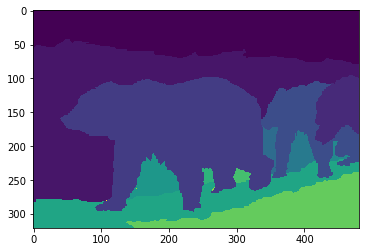

(321, 481, 3)

In [102]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.imshow(x)
plt.show()
y.shape

## K-Means Algorithm Implementation

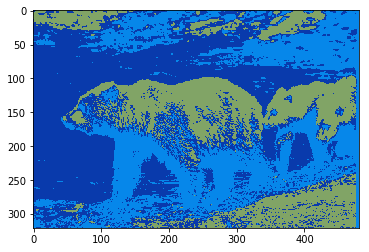

In [85]:
from sklearn.cluster import KMeans
import numpy as np

#From original data
#Reshape to 2D - one column per rgb colour
data = y.reshape(y.shape[0] * y.shape[1], 3)

# Initializing KMeans
kmeans = KMeans(n_clusters=3)

# Fitting with inputs
kmeans = kmeans.fit(data)

# Find corresponding center to data
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

# Reshgape data to 3D 
y_recolored = new_colors.reshape(y.shape)

#Plot data
plt.imshow(y_recolored)
plt.show()

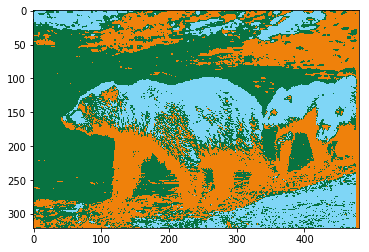

In [29]:
from sklearn.decomposition import PCA

#Using PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(data)

# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(reduced_data)

new_colors = kmeans.cluster_centers_[kmeans.predict(reduced_data)]
y_recolored = np.absolute(new_colors.reshape(y.shape)) #I should not be doing absolute
plt.imshow(y_recolored)
plt.show()


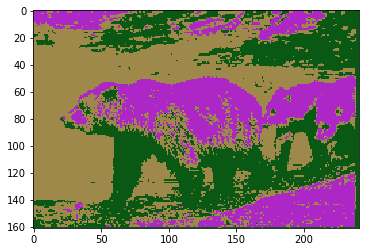

In [84]:
#Using Downsample
r = downscale_local_mean(y, (2, 2, 1))
data = r.reshape(r.shape[0] * r.shape[1], 3)

# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(data)

new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
r_recolored = np.absolute(new_colors.reshape(r.shape)) #I should not be doing absolute
plt.imshow(r_recolored)
plt.show()

## Self-Organizing Map Algorithm Implementation

In [14]:
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu

data_normalized = normalize(data, norm='l2')
data_ = data_normalized.reshape(321 * 481, 3)

# n_rows, n_columns = 154401, 3
# som = somoclu.Somoclu(n_columns, n_rows, data=data_)
# som.train(data_)
# som.view_component_planes()

## Fuzzy C-Means Algorithm Implementation

In [15]:
import skfuzzy

fzz = skfuzzy.cluster.cmeans(data, c = 3,m = 2, error=0.005, maxiter=1000)
fzz[1]

array([[  8.51692694e-16,   6.41138173e-16,   1.00000000e+00],
       [  1.00000000e+00,   2.02619843e-16,   2.79035051e-14],
       [  1.32705495e-15,   1.00000000e+00,   1.37573317e-13]])

## Spectral Clustering Algorithm Implementation

In [94]:
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
from skimage.transform import downscale_local_mean
import numpy as np
import time
import scipy as sp

data_ = downscale_local_mean(y, (3, 3, 1))

# graph = image.img_to_graph(data_)


# beta = 5
# eps = 1e-6
# graph.data = np.exp(-beta * graph.data / data.std()) + eps

# N_REGIONS = 3

# ###############################################################################
# # Visualize the resulting regions

# for assign_labels in ('kmeans', 'discretize'):
#     t0 = time.time()
#     labels = spectral_clustering(graph, n_clusters=N_REGIONS,
#                                  assign_labels=assign_labels,
#                                  random_state=1)
#     t1 = time.time()
#     labels = labels.reshape(data.shape)

#     plt.figure(figsize=(5, 5))
#     plt.imshow(data,   cmap=plt.cm.gray)
#     for l in range(N_REGIONS):
#         plt.contour(labels == l, contours=1,
#                     colors=[plt.cm.spectral(l / float(N_REGIONS)), ])
#     plt.xticks(())
#     plt.yticks(())
#     plt.title('Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0)))

# plt.show()

# data = data_.reshape(321 * 481, 3)

# # Initializing SpectralClustering
# spectralClust = SpectralClustering(n_clusters=3, affinity="nearest_neighbors", assign_labels = 'discretize')
# # Fitting with inputs
# spectralClust = spectralClust.fit(data)

# new_colors = spectralClust.cluster_centers_[spectralClust.predict(data)]
# y_recolored = new_colors.reshape(y.shape)
# plt.imshow(y_recolored)
# plt.show()

ValueError: array must be 2-dimensional and square. shape = (17227, 3)

### Gaussian Mixture Models